# Ejercicio 1

## a)

En primer lugar necesitamos importar las dependencias necesarias, las cuales son

In [48]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Luego debemos instanciar las clases y crear los datos

In [49]:
factory = PokemonFactory("pokemon.json")
snorlax = factory.create("snorlax", 100, StatusEffect.NONE, 1)
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]
capture_rates = []
std_errors = []

En el siguiente codigo se realiza, con todas las pokebolas,  100 intentos de atrapar a snorlax.

In [50]:
for pokeball_type in pokeballs:
    capture_attempts = []
    for i in range(100):
        capture_attempts.append(attempt_catch(snorlax, pokeball_type)[0])
        
    capture_rate = sum(capture_attempts) / len(capture_attempts)
    capture_rates.append(capture_rate)
    std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
    std_errors.append(std_error)

Luego creamos el data frame donde almacenamos todos los datos que se van a graficar

In [51]:
data = pd.DataFrame({'pokeball_type': pokeballs, 'capture_rate': capture_rates})

Finalmente creamos el grafico de barras con las respectivas barras de errores

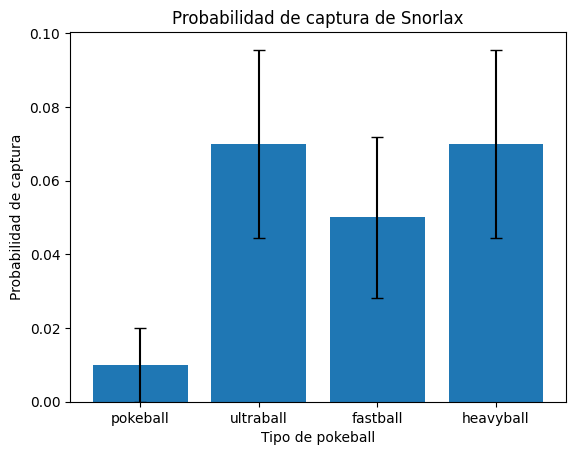

In [52]:
plt.bar(data['pokeball_type'], data['capture_rate'], yerr=std_errors, capsize=4)
plt.title('Probabilidad de captura de Snorlax')
plt.xlabel('Tipo de pokeball')
plt.ylabel('Probabilidad de captura')
plt.show()
